<h2><strong>Modulo 2:</strong> Aprendizaje supervisado: regresión lineal y logística</h2>
<p><strong>Estudiante:</strong> Jason Andrés Urrutia Orellana</p>

In [165]:
# Librerías utilizadas en este trabajo
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

<h3><strong>Consigna A)</strong> Analizar valores faltantes para todas las variables</h3>

In [136]:
#Importaremos los archivos a leer
test = pd.read_csv("test.csv")
train = pd.read_csv("train.csv")
#Previsualizamos brevemente sus datos para tener conocimiento de ellos
print(f"Datos en test: \n{test.head()}")
print(f"Datos en train: \n{train.head()}")

Datos en test: 
   PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S  
Datos en train: 
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   


In [137]:
#Crearemos una función que analizará los datos faltantes
def nulos(df, archivo):
    nulos = df.isnull().sum()
    total = len(df)
    print(f"\nValores faltantes en archivo: --{archivo}--")
    for col, cantidad in nulos.items():
        porcentaje = (cantidad / total) * 100
        print(f"{col} ➤ {cantidad} nulos ({porcentaje:.2f}%)")
    return nulos


In [138]:
#Probaremos la función para detectar los datos faltantes
nulos_test = nulos(test, "test_csv")

nulos_train = nulos(train, "train.csv")


Valores faltantes en archivo: --test_csv--
PassengerId ➤ 0 nulos (0.00%)
Pclass ➤ 0 nulos (0.00%)
Name ➤ 0 nulos (0.00%)
Sex ➤ 0 nulos (0.00%)
Age ➤ 86 nulos (20.57%)
SibSp ➤ 0 nulos (0.00%)
Parch ➤ 0 nulos (0.00%)
Ticket ➤ 0 nulos (0.00%)
Fare ➤ 1 nulos (0.24%)
Cabin ➤ 327 nulos (78.23%)
Embarked ➤ 0 nulos (0.00%)

Valores faltantes en archivo: --train.csv--
PassengerId ➤ 0 nulos (0.00%)
Survived ➤ 0 nulos (0.00%)
Pclass ➤ 0 nulos (0.00%)
Name ➤ 0 nulos (0.00%)
Sex ➤ 0 nulos (0.00%)
Age ➤ 177 nulos (19.87%)
SibSp ➤ 0 nulos (0.00%)
Parch ➤ 0 nulos (0.00%)
Ticket ➤ 0 nulos (0.00%)
Fare ➤ 0 nulos (0.00%)
Cabin ➤ 687 nulos (77.10%)
Embarked ➤ 2 nulos (0.22%)


<p>En ambos archivos la mayor cantidad de valores faltantes es en las variables "Cabin", y "Age", mientras que en test particularmente falta 1 dato en "Fare" así como en train particularmente falta 2 datos en "Embarked" </p>

<h1>&#10004;</h1>

<h3><strong>Consigna B)</strong> Completar todos los datos o valores faltantes</h3>

<p>Veamos las variables con datos faltantes una a una, primero con Age, ya vimos que en cada csv faltaba alrededor de un 20% de los datos en esta columna, tanto en train como en test</p>

In [139]:
#Age
test["Age"].describe()

count    332.000000
mean      30.272590
std       14.181209
min        0.170000
25%       21.000000
50%       27.000000
75%       39.000000
max       76.000000
Name: Age, dtype: float64

In [140]:
train["Age"].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

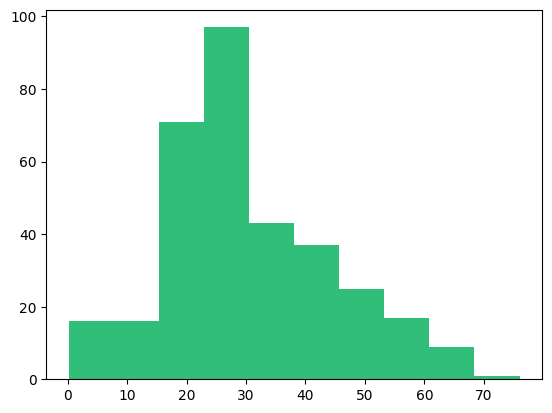

In [141]:
test["Age"].hist(
    grid=False,
    color="#31be78",
)
plt.show()

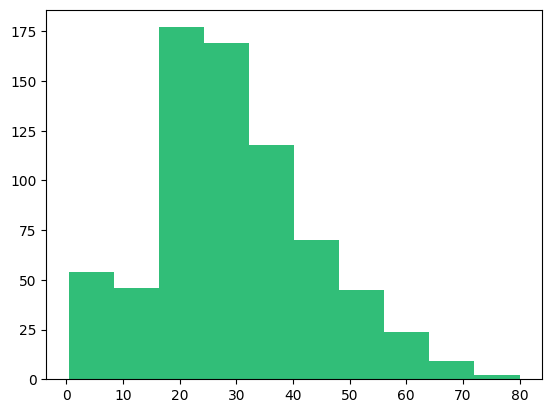

In [142]:
train["Age"].hist(
    grid=False,
    color="#31be78"
)
plt.show()

<p>Podemos ver que existen valores muy extremos, cómo que el mínimo de edad es 0 y el máximo 76 y 80 respectivamente, mientras que, notamos que la gran mayoría de pasajeros rondaban entre los +18 y 30 años, se procede a elegir imputar los faltantes por la mediana de los datos, y no por el promedio, debido a que el promedio puede verse alterada por los valores extremos, niños y ancianos</p>

In [143]:
train["Age"].fillna(train["Age"].median(), inplace=True)
test["Age"].fillna(test["Age"].median(), inplace=True)

C:\Users\Abigail y Jason\AppData\Local\Temp\ipykernel_8492\2963239186.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train["Age"].fillna(train["Age"].median(), inplace=True)
C:\Users\Abigail y Jason\AppData\Local\Temp\ipykernel_8492\2963239186.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always b

<p>Ahora vamos con "Cabin", por lo que ya sabemos, en esta columna falta un 78% y un 77% de los datos en cada archivo, por lo tanto, desde ya podemos descartar el imputar por la moda, porque no contamos con datos suficientes como para generalizar</p>

In [144]:
test["Cabin"].describe()

count                  91
unique                 76
top       B57 B59 B63 B66
freq                    3
Name: Cabin, dtype: object

In [145]:
train["Cabin"].describe()

count         204
unique        147
top       B96 B98
freq            4
Name: Cabin, dtype: object

<p>También descubrimos que no se trata de valores numéricos, por lo tanto, tampoco se podría aplicar por la mediana o por el promedio, así que frente a este escenario se decide imputar declarando los valores faltantes como "desconocidos"<p/>

In [146]:
for faltantes in [test, train]:
    faltantes["Cabin"] = faltantes["Cabin"].fillna("Unknown") 

<p>Ahora en el archivo test, unicamente falta 1 dato en la columna "Fare" que significa tarifa, por lo tanto ya intuimos que se trata de un valor numérico de precio, veamos que decisión tomar</p>

In [147]:
test["Fare"].describe()

count    417.000000
mean      35.627188
std       55.907576
min        0.000000
25%        7.895800
50%       14.454200
75%       31.500000
max      512.329200
Name: Fare, dtype: float64

<p>Como notamos se aprecia que existía una variabilidad en los precios, el máximo es muy elevado y el mínimo muy bajo, caso muy similar a Age, por lo tanto, se decide imputar el dato por la mediana, nuevamente</p> 

In [148]:
test["Fare"] = test["Fare"].fillna(test["Fare"].median())

<p>Finalmente debemos ver qué decidir para los 2 datos faltantes en "Embarked" del archivo train</p>

In [149]:
train["Embarked"].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

<p>Notamos que existen solamente 3 valores y que la grandísima mayoría de datos (644 de 889) su valor es "S", lo que nos lleva a concluir que, para rellenar solamente 2 valores, lo más lógico sería seleccionar imputar por la moda </p>

In [150]:
train["Embarked"] = train["Embarked"].fillna(train["Embarked"].mode()[0])

In [151]:
#Por último, volveremos a ejecutar la función antes creada para verificar si queda algun valor faltante
nulos(test, "test_csv")
nulos(train, "train_csv")


Valores faltantes en archivo: --test_csv--
PassengerId ➤ 0 nulos (0.00%)
Pclass ➤ 0 nulos (0.00%)
Name ➤ 0 nulos (0.00%)
Sex ➤ 0 nulos (0.00%)
Age ➤ 0 nulos (0.00%)
SibSp ➤ 0 nulos (0.00%)
Parch ➤ 0 nulos (0.00%)
Ticket ➤ 0 nulos (0.00%)
Fare ➤ 0 nulos (0.00%)
Cabin ➤ 0 nulos (0.00%)
Embarked ➤ 0 nulos (0.00%)

Valores faltantes en archivo: --train_csv--
PassengerId ➤ 0 nulos (0.00%)
Survived ➤ 0 nulos (0.00%)
Pclass ➤ 0 nulos (0.00%)
Name ➤ 0 nulos (0.00%)
Sex ➤ 0 nulos (0.00%)
Age ➤ 0 nulos (0.00%)
SibSp ➤ 0 nulos (0.00%)
Parch ➤ 0 nulos (0.00%)
Ticket ➤ 0 nulos (0.00%)
Fare ➤ 0 nulos (0.00%)
Cabin ➤ 0 nulos (0.00%)
Embarked ➤ 0 nulos (0.00%)


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

<h1>&#10004;</h1>

<h3><strong>Consigna C)</strong> Ajustar el primer modelo de regresiós logística</h3>

<p>Seleccionaremos las columnas que serán utilizadas para predecir</p>

In [152]:
train__ = train[["Survived","Pclass","Sex","Age","SibSp","Parch","Fare","Embarked"]].copy()

<p>Convertiremos los datos que son categóricos a tipo numérico</p>

In [153]:
#Columna "Sex"
train__["Sex"] = train__["Sex"].map({"male":0, "female":1})

In [154]:
#Columna "Embarked"
train__["Embarked"] = train__["Embarked"].map({"S":0, "C":1, "Q":2})

<p>Ahora, separaremos las variables</p>

In [155]:
x = train__[["Pclass","Sex","Age","SibSp","Parch","Fare","Embarked"]]
y = train__["Survived"]

<p>Y ahora si, podemos crear el modelo</p>

In [156]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=1)

modelo = LogisticRegression(max_iter=200)

<h1>&#10004;</h1>

<h3><strong>Consigna D:</strong> Entrenar y determinar el nivel de accuracy del primer modelo</h3>

In [157]:
modelo.fit(x_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,200
,multi_class,'deprecated'


In [158]:
y_pred = modelo.predict(x_test)

resultados = pd.DataFrame({
    "Real": y_test,
    "Predicción": y_pred})
resultados.tail() #Esto crea y muestra un dataframe comparativo

,Real,Predicción
506,1,1
467,0,0
740,1,1
354,0,0
449,1,0


In [159]:
accuracy = accuracy_score(y_test, y_pred)
print(f"El modelo obtuvo un accuracy de {accuracy*100:.2f}% en el conjunto de prueba.")

El modelo obtuvo un accuracy de 82.06% en el conjunto de prueba.


In [160]:
# Matriz de confusión

cm = confusion_matrix(y_test, y_pred)
print(cm)

[[112  16]
 [ 24  71]]


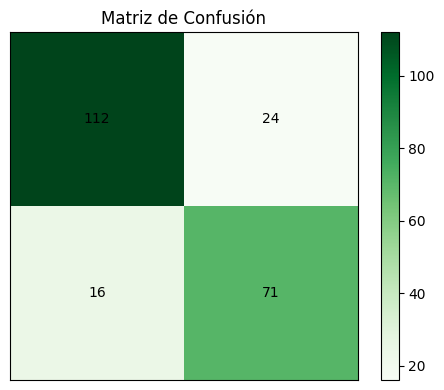

In [172]:
#Graficado
plt.figure(figsize=(5,4))
plt.imshow(cm, cmap="Greens")
plt.title("Matriz de Confusión")
plt.colorbar()
plt.xticks([])
plt.yticks([])
plt.tight_layout()
for a, b in np.ndindex(cm.shape):
    plt.text(a, b, cm[a, b], ha="center", va="center", color="black")
plt.show()

El accuracy nos indica que el modelo finalmente obtuvo un 82,06% de efectividad en su predicción, por otra parte, la matriz de confusión nos indica que 183 datos fueron acertados y que 40 fueron errados.

<h1>&#10004;</h1>